In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from typing import TypedDict, Annotated
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langchain_core.messages import BaseMessage, HumanMessage
load_dotenv()

True

In [12]:
# create state class
class messageState(TypedDict):
    messages: Annotated[list[BaseMessage], add_messages]

In [18]:
llm = ChatGroq(model="llama-3.3-70b-versatile", temperature=0.7, max_tokens=30)

# create nodes
def chat_node(state: messageState):
    output = llm.invoke(state['messages'])
    return {'messages': [output]}


In [19]:
# create graph
graph = StateGraph(messageState)

# attach node
graph.add_node("chat_node", chat_node)

# connect edges
graph.add_edge(START, "chat_node")
graph.add_edge("chat_node", END)

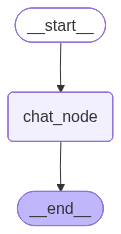

In [ ]:
# create workflow
checkpointer = MemorySaver() # MemorySaver is alias to InMemorySaver
workflow = graph.compile(checkpointer=checkpointer)
workflow

In [29]:
config1 = {"configurable": {"thread_id": "1"}}
while True:
    user_input = input("Type here: ")
    print("User:", user_input)

    if user_input.strip().lower() in ["exit", "bye", "stop", "quit"]:
        break
    
    
    output = workflow.invoke({"messages": HumanMessage(content=user_input)}, config=config1)

    print("AI:", output['messages'][-1].content, "\n")

User: what is my name
AI: Your name is Arbaz. 

User: exit


In [30]:
workflow.get_state(config1)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is arbaz', additional_kwargs={}, response_metadata={}, id='28207e7f-7549-48c5-918a-7a32d5dcb130'), AIMessage(content="Hello Arbaz! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 41, 'total_tokens': 68, 'completion_time': 0.055261686, 'prompt_time': 0.002035286, 'queue_time': 0.052394844, 'total_time': 0.057296972}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--3c4213c8-3d16-47ee-ae49-6797689aa29e-0', usage_metadata={'input_tokens': 41, 'output_tokens': 27, 'total_tokens': 68}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='e8708c6c-205f-4c6f-960e-3a2647dabd83'), AIMessage(content='Your name is Arbaz.', additional_kwargs={},

In [31]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'messages': [HumanMessage(content='hi my name is arbaz', additional_kwargs={}, response_metadata={}, id='28207e7f-7549-48c5-918a-7a32d5dcb130'), AIMessage(content="Hello Arbaz! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 41, 'total_tokens': 68, 'completion_time': 0.055261686, 'prompt_time': 0.002035286, 'queue_time': 0.052394844, 'total_time': 0.057296972}, 'model_name': 'llama-3.3-70b-versatile', 'system_fingerprint': 'fp_155ab82e98', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--3c4213c8-3d16-47ee-ae49-6797689aa29e-0', usage_metadata={'input_tokens': 41, 'output_tokens': 27, 'total_tokens': 68}), HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='e8708c6c-205f-4c6f-960e-3a2647dabd83'), AIMessage(content='Your name is Arbaz.', additional_kwargs={}